In [7]:
import os
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from itertools import dropwhile
from scipy.optimize import curve_fit

ecdc_path = '../Datasets/DLL/ECDC/DLL_COVID_TRAIN.csv'

data = pd.read_csv(ecdc_path, parse_dates=['dateRep'])
data['dates'] = data['dateRep'].dt.date
# data.head()

country_keys = list(set(data['countryterritoryCode']))

country_data = {}
for key in country_keys:
    d = data[data.countryterritoryCode==key]
    country_data[key] = d


In [8]:
def f(t, a, b, c):
    return np.exp(a-(a-b)*np.exp(-c*t))

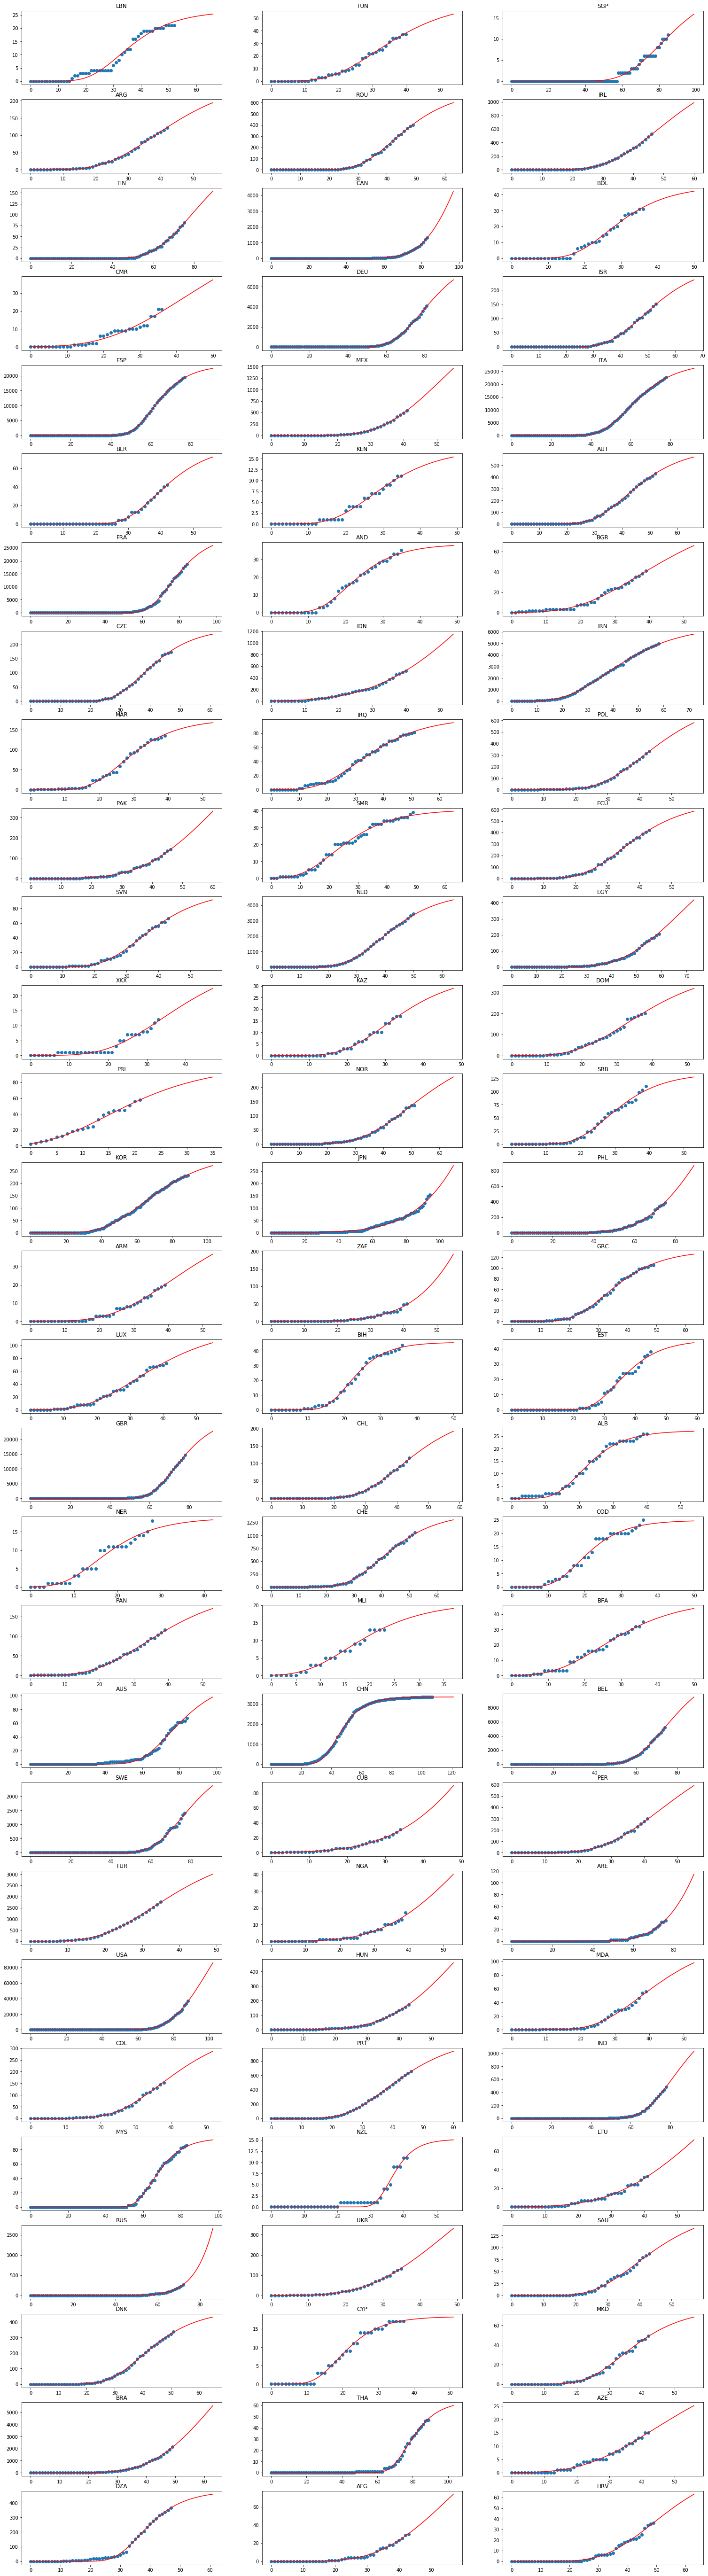

<Figure size 432x288 with 0 Axes>

In [9]:
fig, axs = plt.subplots(29, 3, figsize=(26, 100))
axs = axs.flatten()
conv = []
no_conv = []
i = 0

output_fitted = {}

for key in country_keys:
    country = country_data[key]
    dates = list(country['dates'])
    cases = list(country['cases'])
    deaths = list(country['deaths'])
    dates.reverse()
    cases.reverse()
    deaths.reverse()
    dates = np.array(dates)
    cum_cases = np.array(cases).cumsum()
    cum_deaths = np.array(deaths).cumsum()

    cum_cases = list(dropwhile(lambda x: x==0, cum_cases))
    new_dates = dates[-len(cum_cases):]
    cum_deaths = cum_deaths[-len(cum_cases):]
    
    if key == 'CHN':
        new_dates = new_dates[:-2]
        cum_cases = cum_cases[:-2]
        cum_deaths = cum_deaths[:-2]
        
    x = np.array(range(len(new_dates)))
    y = np.array(cum_deaths)
    if max(y) < 10 or key == 'HND':
        no_conv.append(key)
        continue
        
    try:
        popt, pcov = curve_fit(f, x, y)  # fit krivulje na podacima od start do start+50
        conv.append(key)
        test = np.arange(len(x)+14)
        axs[i].scatter(x, y)
        axs[i].plot(test, f(test, *popt), 'r-')
        axs[i].set_title(key)
        i += 1
        
        x_predict = list(test[-14:])
        y_predict = [f(x, *popt) for x in x_predict]
        out = np.round(np.array([cum_deaths[-1]] + y_predict))
        out = np.array(np.diff(out), dtype=int)
        output_fitted[key] = np.array([x if x>0 else 0 for x in out])
        
    except RuntimeError:
        #print("No convergence for: ", key)
        no_conv.append(key)
        continue

plt.show()
plt.savefig('death_predicts.png')

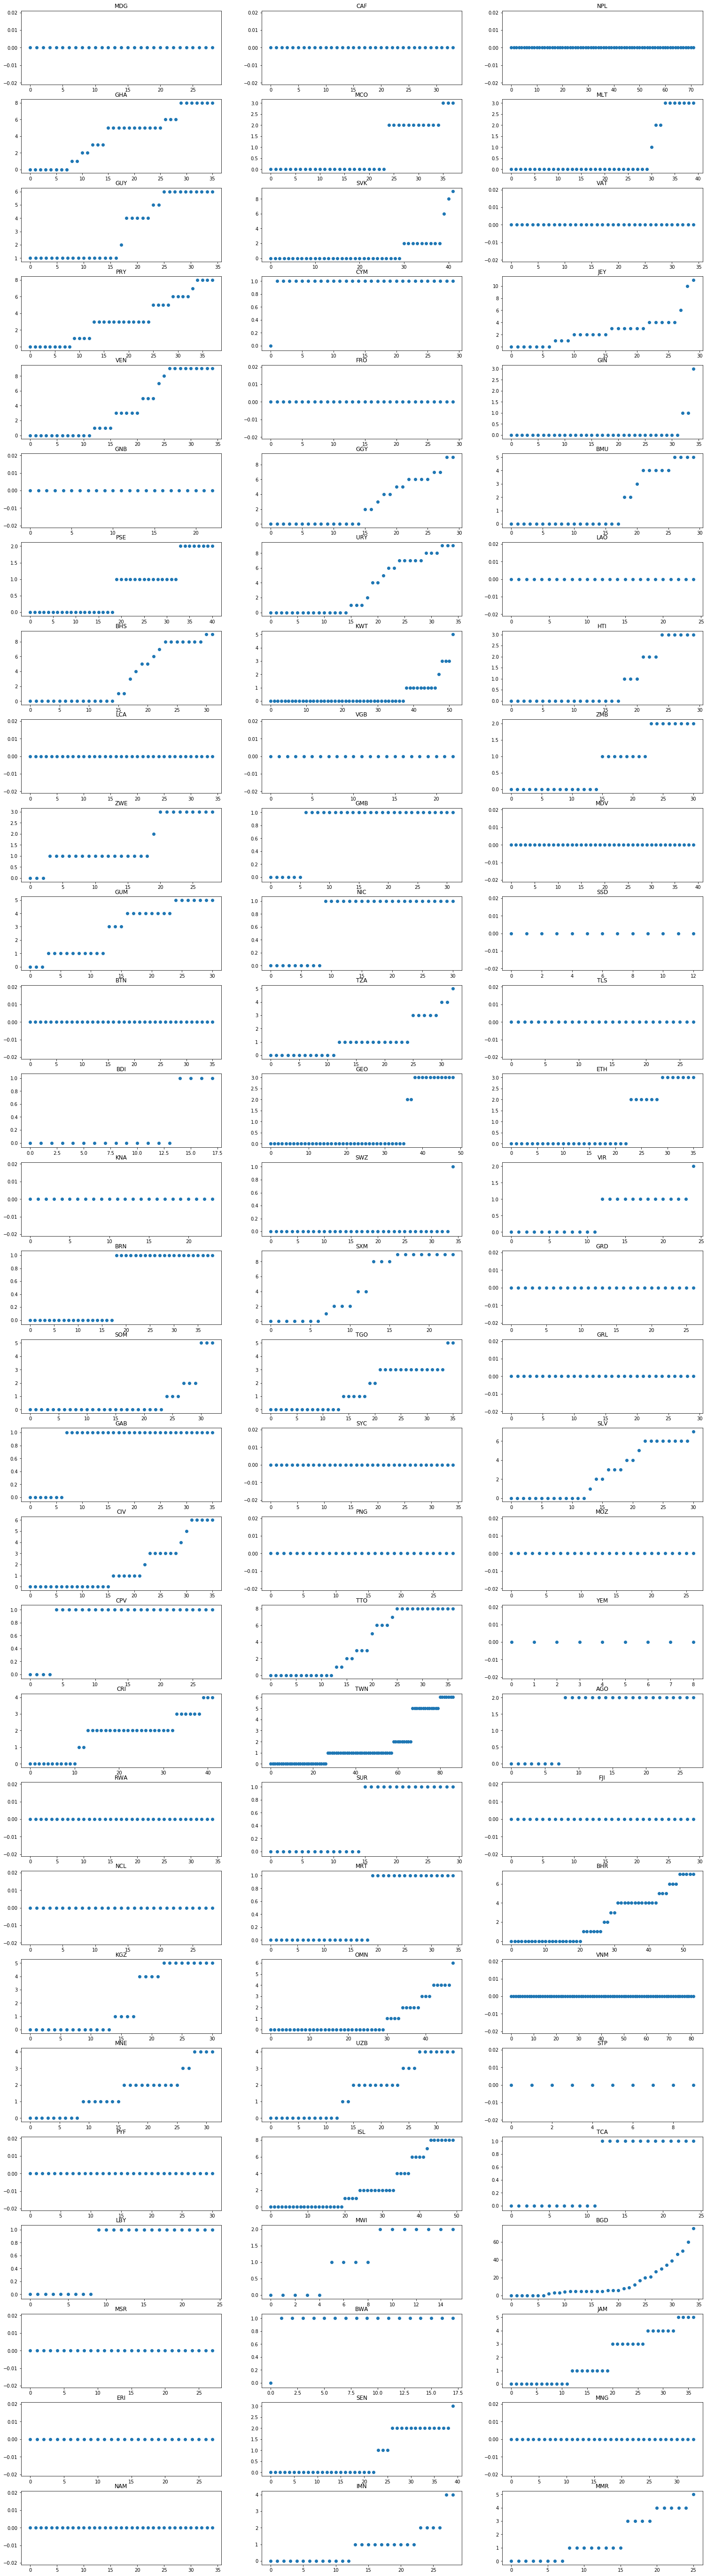

<Figure size 432x288 with 0 Axes>

In [10]:
fig, axs = plt.subplots(29, 3, figsize=(26, 100))
axs = axs.flatten()

output_zeros = {}
keys_left = []

for i, key in enumerate(no_conv):
    country = country_data[key]
    dates = list(country['dates'])
    cases = list(country['cases'])
    deaths = list(country['deaths'])
    dates.reverse()
    cases.reverse()
    deaths.reverse()
    dates = np.array(dates)
    cum_cases = np.array(cases).cumsum()
    cum_deaths = np.array(deaths).cumsum()
    
    cum_cases = list(dropwhile(lambda x: x==0, cum_cases))
    new_dates = dates[-len(cum_cases):]
    cum_deaths = cum_deaths[-len(cum_cases):]
    
    x = np.array(range(len(new_dates)))
    y = np.array(cum_deaths)
    
    if np.max(y) <= 10:
        output_zeros[key] = np.array([0 for _ in range(14)], dtype=int)
    else:
        keys_left.append(key)
    
    if i < 87:
        axs[i].scatter(x, y)
        axs[i].set_title(key)
    
plt.show()
plt.savefig('not_fitted_deaths.png')

['JEY', 'BGD', 'HND']
JEY
[ 3  3  4  4  4  4  4  6 10 11]
BGD
[20 21 27 30 34 39 46 50 60 75]
HND
[23 23 24 25 25 26 31 35 41 46]


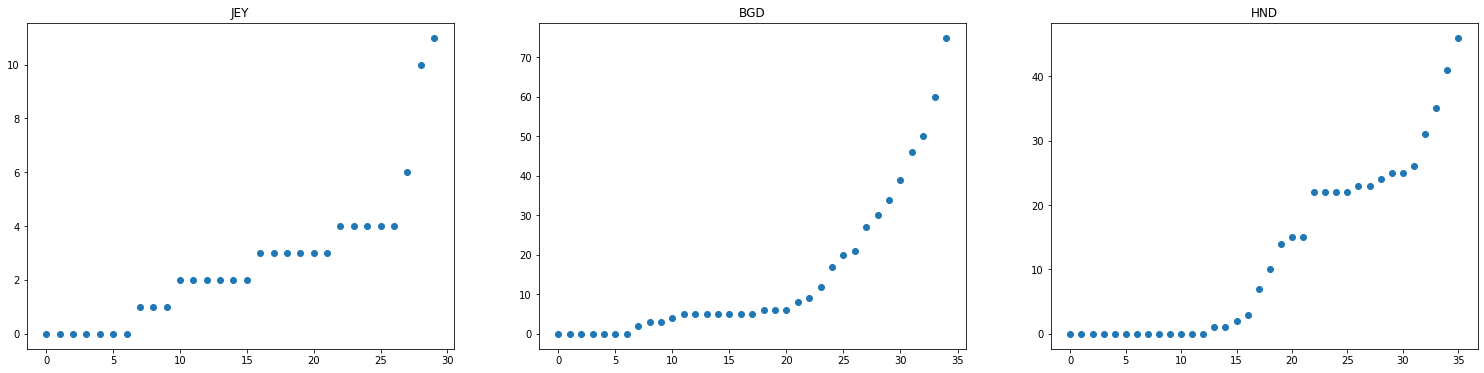

In [11]:
fig, axs = plt.subplots(1, 3, figsize=(26, 6))
axs = axs.flatten()

print(keys_left)

output_manual = {}

for i, key in enumerate(keys_left):
    country = country_data[key]
    dates = list(country['dates'])
    cases = list(country['cases'])
    deaths = list(country['deaths'])
    dates.reverse()
    cases.reverse()
    deaths.reverse()
    dates = np.array(dates)
    cum_cases = np.array(cases).cumsum()
    cum_deaths = np.array(deaths).cumsum()
    
    cum_cases = list(dropwhile(lambda x: x==0, cum_cases))
    new_dates = dates[-len(cum_cases):]
    cum_deaths = cum_deaths[-len(cum_cases):]
    
    x = np.array(range(len(new_dates)))
    y = np.array(cum_deaths)
    
    print(key)
    print(cum_deaths[-10:])
    
    if key == 'HND':
        output_manual[key] = np.array([5 for _ in range(14)], dtype=int)
    elif key == 'BGD':
        output_manual[key] = np.array([5 for _ in range(14)], dtype=int)
    elif key == 'JEY':
        output_manual[key] = np.array([1 for _ in range(14)], dtype=int)
    else:
        output_manual[key] = np.array([1 for _ in range(14)], dtype=int)
    
    axs[i].scatter(x, y)
    axs[i].set_title(key)
    
plt.show()

TypeError: <_io.TextIOWrapper name='deaths.csv' mode='w' encoding='UTF-8'> is not a callable object

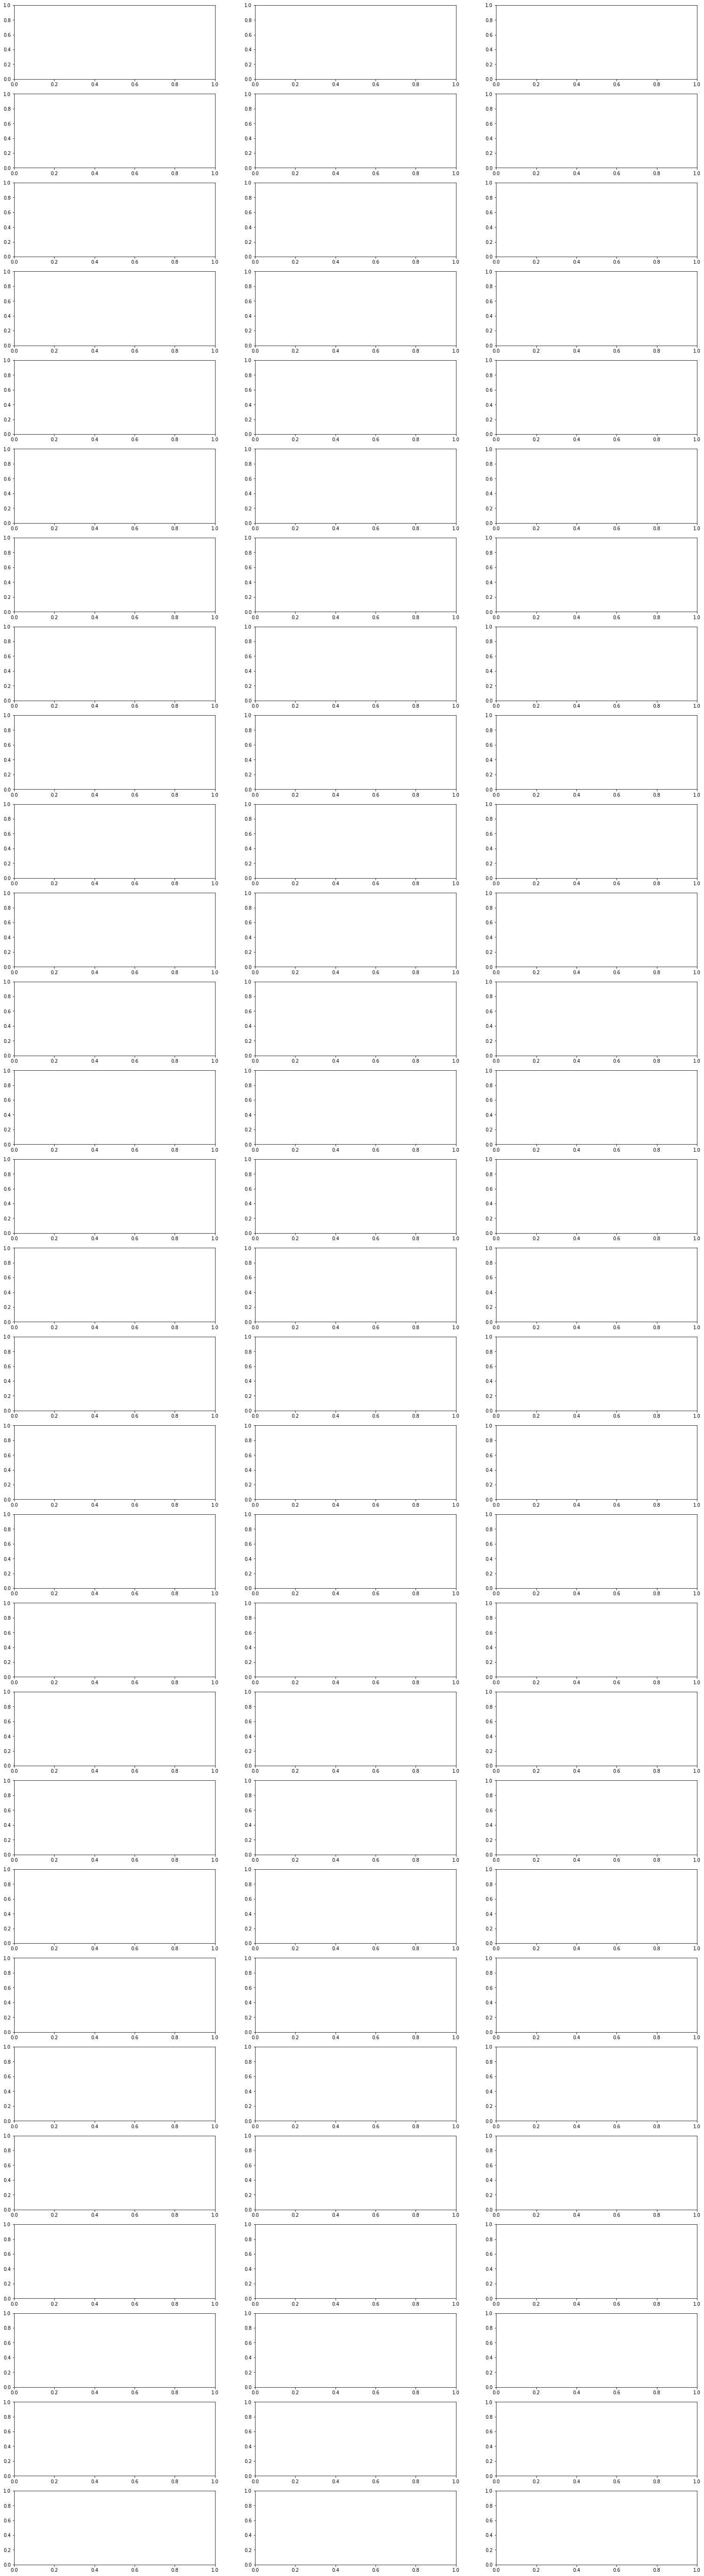

In [14]:
data = pd.read_csv(ecdc_path, parse_dates=['dateRep'])
data['dates'] = data['dateRep'].dt.date
# data.head()

country_keys = list(set(data['countryterritoryCode']))

country_data = {}
for key in country_keys:
    d = data[data.countryterritoryCode==key]
    country_data[key] = d

fig, axs = plt.subplots(29, 3, figsize=(26, 100))
axs = axs.flatten()
conv = []
no_conv = []
i = 0

output_fitted = {}

for key in country_keys:
    country = country_data[key]
    dates = list(country['dates'])
    cases = list(country['cases'])
    deaths = list(country['deaths'])
    dates.reverse()
    cases.reverse()
    # deaths.reverse()
    dates = np.array(dates)
    cum_cases = np.array(cases).cumsum()
    cum_deaths = np.array(deaths).cumsum()

    cum_cases = list(dropwhile(lambda x: x==0, cum_cases))
    new_dates = dates[-len(cum_cases):]
    cum_deaths = cum_deaths[-len(cum_cases):]
    
    if key == 'CHN':
        new_dates = new_dates[:-2]
        cum_cases = cum_cases[:-2]
        cum_deaths = cum_deaths[:-2]
        
    x = np.array(range(len(new_dates)))
    y = np.array(cum_cases)
    if max(y) < 10:
        no_conv.append(key)
        continue
        
    try:
        popt, pcov = curve_fit(f, x, y)  # fit krivulje na podacima od start do start+50
        conv.append(key)
        test = np.arange(len(x)+14)
        if i < 87:
            axs[i].scatter(x, y)
            axs[i].plot(test, f(test, *popt), 'r-')
            axs[i].set_title(key)
        i += 1
        
        x_predict = list(test[-14:])
        y_predict = [f(x, *popt) for x in x_predict]
        out = np.round(np.array([cum_cases[-1]] + y_predict))
        out = np.array(np.diff(out), dtype=int)
        output_fitted[key] = np.array([x if x>0 else 0 for x in out])
        
    except RuntimeError:
        #print("No convergence for: ", key)
        no_conv.append(key)
        continue

plt.show()
plt.savefig('cases_predicts.png')

In [12]:
deaths_output = {}
dates_output = np.array(['2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
                         '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02'])

for k, v in output_fitted.items():
    deaths_output[k] = v
for k, v in output_manual.items():
    deaths_output[k] = v
for k, v in output_zeros.items():
    deaths_output[k] = v
    
with open('deaths.csv', 'w') as f:
    f.write('Country,Date,Deaths\n')
    for key, values in deaths_output.items():
        for date, value in zip(dates_output, values):
            f.write(key+','+str(date)+','+str(value)+'\n')